In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw

import nltk
from nltk import bigrams
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import re
import networkx as nx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielborg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
consumer_key= "lpgD24jsZ7DId5En6R2YDghue"
consumer_secret= "jt01NSPdKlVBHYMTomHxfPpctfcNvG1YNiOTbTLTlz9Lskmr64"
access_token= "1159820778612908033-JqpjPKpNQMlDTvCxSmiXtxbCOpVKw0"
access_token_secret= "O1NWQ83sX4fp8DL4fK2Keq6JHEF0GyJXXHRnjVD9pwEjo"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [17]:
# Create a custom search term and define the number of tweets
search_term = "architecture+AI -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)



In [18]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [19]:
# Remove URLs
tweets_no_urls_inc = [remove_url(tweet.text) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls_inc]

In [20]:
#filename="tweet_url.txt"

#with open(filename, "a") as filehandle:
#    for listitem in tweets_no_urls_inc:
 #       filehandle.write('%s\n' % listitem)

In [21]:
#tweets_no_urls = []

# open file and read the content in a list
#with open(filename, 'r') as filehandle:
#    tweets_no_urls = [current_place.rstrip() for current_place in filehandle.readlines()]

In [22]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]


In [23]:
# Remove collection words
collection_words = ['architecture',"architecture’",'ai','"ai','“ai','#ai', 'creativity','"',"-",'.',',','—','&amp;','&amp']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [24]:
test=tweets_nsw_nc
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*test))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(10)

[('data', 17),
 ('future', 15),
 ('taps', 13),
 ('‘hybrid', 13),
 ('career', 12),
 ('neural', 12),
 ('nro', 12),
 ('might', 11),
 ('eliminate', 11),
 ('versed', 11)]

In [25]:
clean_tweets_ncw_csv = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw_csv.head(10)

,words,count
0,data,17
1,future,15
2,taps,13
3,‘hybrid,13
4,career,12
5,neural,12
6,nro,12
7,might,11
8,eliminate,11
9,versed,11


In [26]:
#filename='tweeter.csv' # where to save it, usually as a twitters.csv

In [27]:
#with open(filename, 'a') as f:
#             (clean_tweets_ncw_csv).to_csv(f, header=False)     

In [28]:

#df = pd.read_csv(filename,index_col=0)

#clean_tweets_ncw = df.reset_index(drop=True)
#clean_tweets_ncw["count"] = pd.to_numeric(clean_tweets_ncw["count"])
#clean_tweets_ncw=clean_tweets_ncw.groupby('words').sum()
#clean_tweets_ncw = clean_tweets_ncw.reset_index()
#clean_tweets_ncw.head(100)

clean_tweets_ncw=clean_tweets_ncw_csv
clean_tweets_ncw.head(100)


,words,count
0,data,17
1,future,15
2,taps,13
3,‘hybrid,13
4,career,12
5,neural,12
6,nro,12
7,might,11
8,eliminate,11
9,versed,11


# plot 

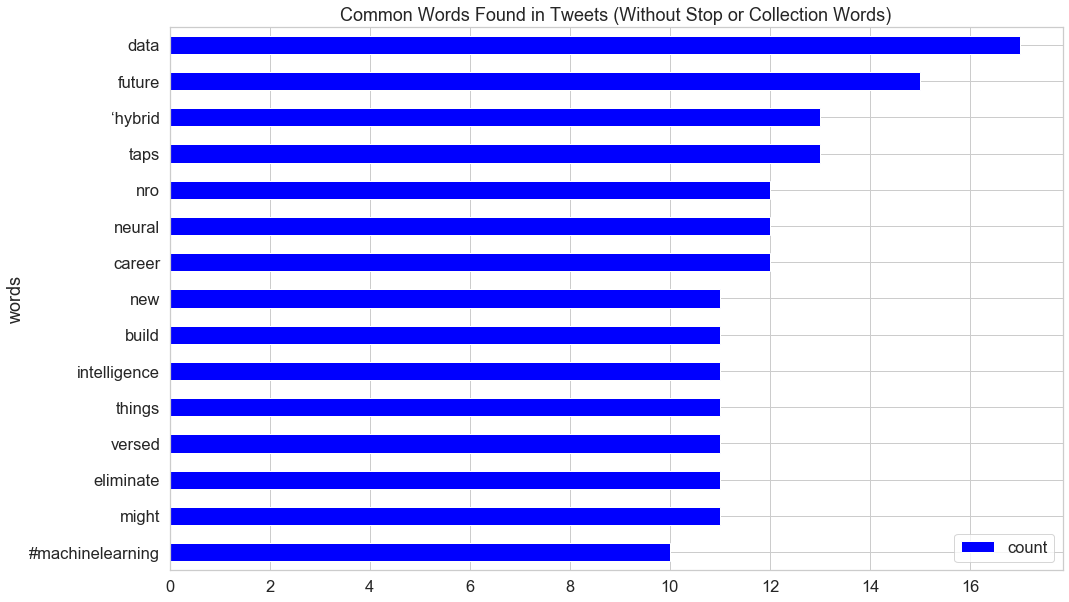

In [29]:
fig, ax = plt.subplots(figsize=(16, 10))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [141]:

def get_text(text_array):
    """ get text from an array"""
    text = " ".join(text_array)
    return text

merged = list(itertools.chain(*tweets_nsw_nc))

all_text = get_text(merged)

print(all_text)

⁦@kbandersen⁩ might eliminate career versed things onl… ⁦@ann_sussman⁩ might eliminate career versed things on… ⁦@yestermorrow⁩ might eliminate career versed things o… ⁦@charlestonarchi⁩ might eliminate career versed things tha… ⁦@createstreets⁩ might eliminate career versed things that… ⁦@stevemouzon⁩ might eliminate career versed things on… ⁦@_buildingbeauty⁩ might eliminate career versed things tha… ⁦@dhruggles⁩ might eliminate career versed things only… ⁦@paulgoldberger⁩ might eliminate career versed things that… ⁦@wrathofgnon⁩ might eliminate career versed things o… “artificial intelligence (ai) might eliminate career versed thi… #artificialintelligence help ask right questions industry h… @jmanooch asked opinions #architecture. i'm really curious take subject. my… @kimminidle yes mosque mosques different architecture. thats op uses mosq… @hannhirai it’s not. mosque come different architecture. example @bxbysxnflwr mosque. mosques many different shape/architecture. don’t know don’

In [153]:
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS
from PIL import Image
from os import path, getcwd

#get the working directory 
d = getcwd()

#numpy image file of mask image 
mask_logo = np.array(Image.open(path.join(d, "twitter_logo.png")))


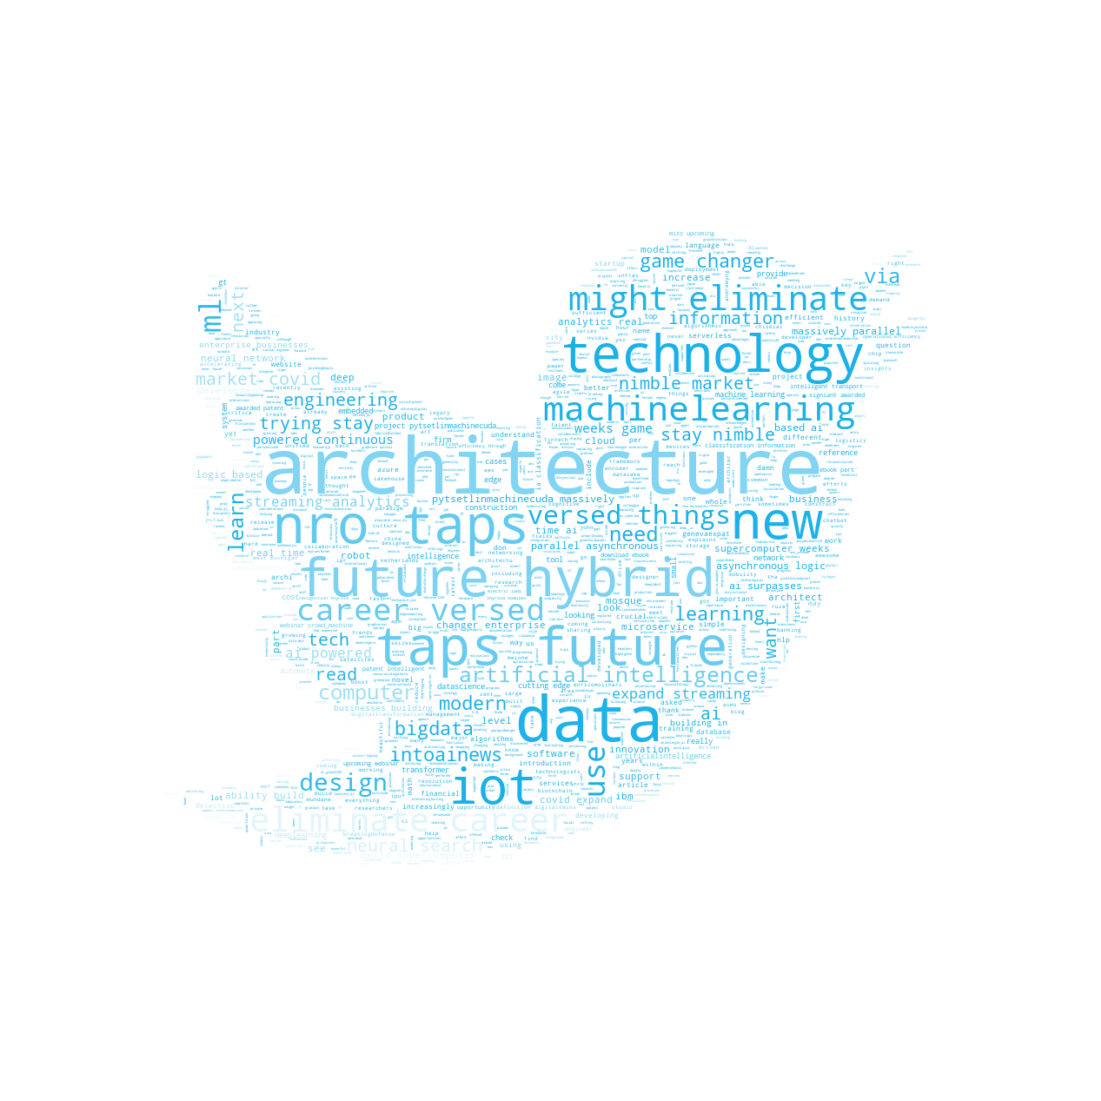

In [156]:
wc= WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1, mask=mask_logo, stopwords=STOPWORDS)
wc.generate(all_text)

image_colors = ImageColorGenerator(mask_logo)

plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()


# Bigrams and network

In [30]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('\u2066@kbandersen\u2069', 'might'),
 ('might', 'eliminate'),
 ('eliminate', 'career'),
 ('career', 'versed'),
 ('versed', 'things'),
 ('things', 'onl…')]

In [31]:
# Original tweet without URLs
tweets_no_urls_inc[9]

'\u2066@wrathofgnon\u2069  “AI might just eliminate architecture as a career for those who are not versed in the things that o… '

In [122]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('taps', 'future'), 13),
 (('future', '‘hybrid'), 13),
 (('nro', 'taps'), 12),
 (('might', 'eliminate'), 11),
 (('eliminate', 'career'), 11),
 (('career', 'versed'), 11),
 (('versed', 'things'), 10),
 (('neural', 'search'), 6),
 (('trying', 'stay'), 6),
 (('stay', 'nimble'), 6),
 (('nimble', 'market'), 6),
 (('market', '#covid-19?'), 6),
 (('expand', 'streaming'), 6),
 (('streaming', 'analytics'), 6),
 (('artificial', 'intelligence'), 6),
 (('pytsetlinmachinecuda', 'massively'), 6),
 (('massively', 'parallel'), 6),
 (('parallel', 'asynchronous'), 6),
 (('asynchronous', 'logic-based'), 6),
 (('logic-based', 'ai.'), 6)]

In [33]:
bigram_df = pd.DataFrame(bigram_counts.most_common(200),
                             columns=['bigram', 'count'])

In [34]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [35]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

node_color = [G.degree(v) for v in G]
node_sizes= bigram_df['count'].to_numpy()
node_sizes=(np.sqrt(node_sizes / (np.sqrt(np.sum(v**2)+1))))*200

font_sizes= bigram_df['count'].to_numpy()

#print(node_sizes)
font_sizes = np.floor(np.sqrt(node_sizes / np.sqrt(np.sum(v**2)))+1).astype(int)

#font_sizes=np.floor(node_sizes/max(font_sizes)+2).astype(int)
#print(font_sizes)

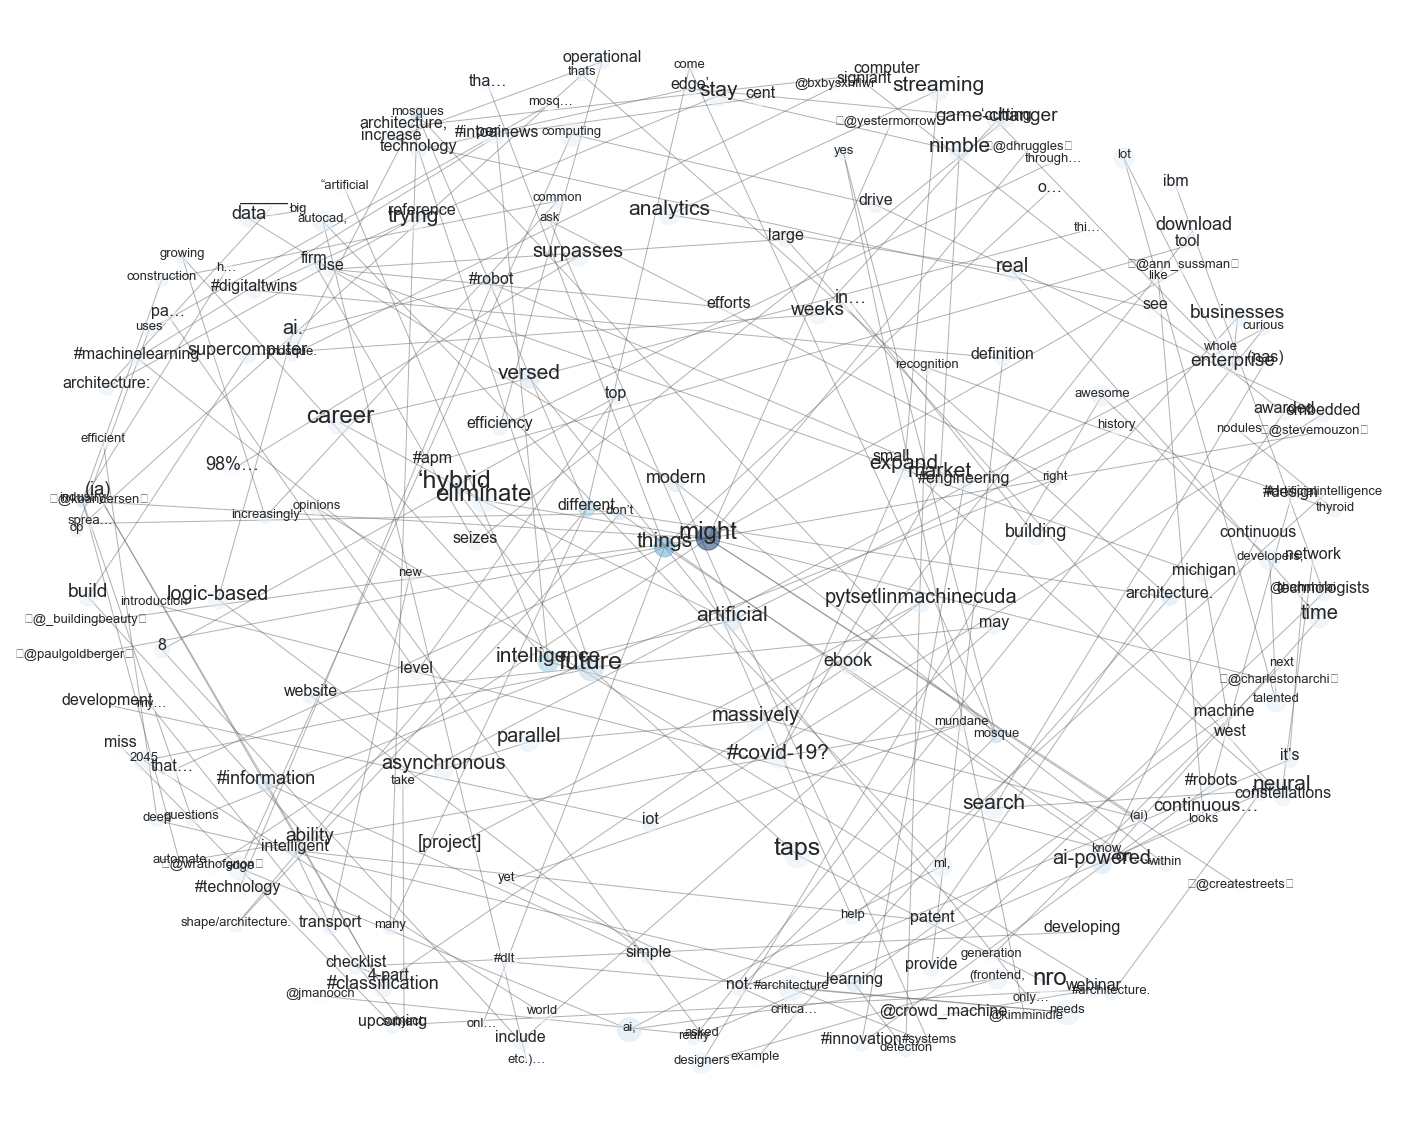

In [120]:
fig, ax = plt.subplots(figsize=(20, 16))
pos = nx.spring_layout(G, k=2)


# Plot networks
nx.draw_networkx(G, pos,
                 node_size = node_sizes,
                 font_size=16,
                 width=1,
                 edge_color='.4',
                 node_color=node_color,
                 with_labels = False,
                 alpha =0.5,
                 cmap=plt.cm.Blues,
                 ax=ax)

# Create offset labels
i=0
for key, value in pos.items():
    x, y = value[0]+.00, value[1]+.00
    i=i+1
    if i < len(font_sizes):
        ax.text(x, y, s=key,
                        #bbox=dict(facecolor='red', alpha=0.25),

                       horizontalalignment='center', fontsize=font_sizes[i-1])
    else:
        ax.text(x, y, s=key,
                        #bbox=dict(facecolor='red', alpha=0.25),

                       horizontalalignment='center', fontsize=min(font_sizes))
    
plt.axis('off')
plt.tight_layout();
plt.show()

# Sentiment analysis

In [37]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls_inc]

In [38]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 '\u2066@KBAndersen\u2069 “AI might just eliminate architecture as a career for those who are not versed in the things that onl… ']

In [39]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.0,⁦@KBAndersen⁩ “AI might just eliminate archite...
1,0.0,⁦@Ann_sussman⁩ “AI might just eliminate archit...
2,0.0,⁦@yestermorrow⁩ “AI might just eliminate archi...
3,0.0,⁦@CharlestonArchi⁩ “AI might just eliminate ar...
4,0.0,⁦@createstreets⁩ “AI might just eliminate arch...


In [40]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

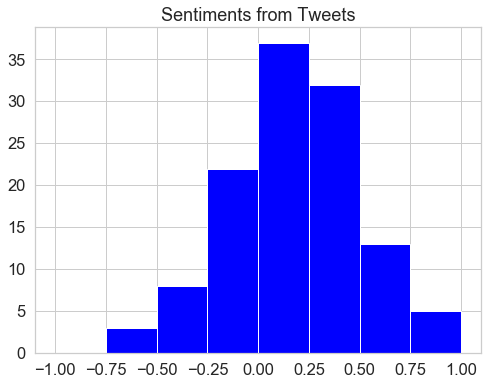

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets")
plt.show()

plt.savefig('sentiment.png', bbox_inches='tight')


# Prediction of influence of nodes for trends in future..

In [90]:

bigram_df['bigram'].apply(lambda x: [item for item in x if item not in stop_words])
bigram_df.head(20)

,bigram,count
0,"(taps, future)",13
1,"(future, ‘hybrid)",13
2,"(nro, taps)",12
3,"(might, eliminate)",11
4,"(eliminate, career)",11
5,"(career, versed)",11
6,"(versed, things)",10
7,"(neural, search)",6
8,"(trying, stay)",6
9,"(stay, nimble)",6


In [106]:
dc = nx.degree_centrality(G)
cc = nx.closeness_centrality(G)
bc = nx.betweenness_centrality(G)

In [107]:
df = pd.DataFrame()

#df['Clustering'] = pd.Series(nx.clustering(G))
df['Betweeness'] = pd.Series(nx.betweenness_centrality(G))
df['PageRank'] = pd.Series(nx.pagerank(G))
#df['closeness_centrality'] = pd.Series(nx.closeness_centrality(G))

In [115]:

#stop_words = set(stopwords.words('english')

df= df.sort_values(by=['PageRank'], ascending=False)
#df.drop(['upcoming','things'], inplace=True) 
df.head(30)

,Betweeness,PageRank
eliminate,0.022188,0.014680
versed,0.018732,0.013233
career,0.020353,0.012567
future,0.025303,0.010809
different,0.005824,0.010013
intelligence,0.059737,0.009392
taps,0.002603,0.008480
modern,0.000853,0.008433
industry,0.023425,0.008092
data,0.000299,0.007973


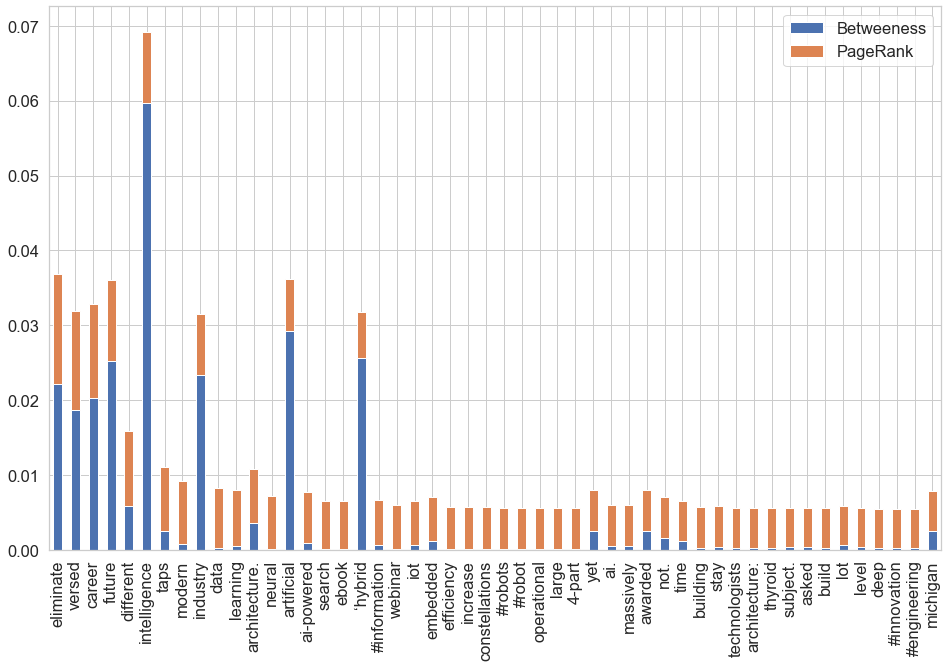

In [116]:
fig, ax = plt.subplots(figsize=(16, 10))
df.iloc[0:50].plot.bar(stacked=True,ax=ax)